# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 7 with the *SuperStore Retail Orders* dataset

In this lab, your assignment is to do a regression model to predict sales revenue.  You can focus your efforts on predicting sales by month and product line.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [298]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders (2).csv')

print (df)

Mounted at /content/gdrive
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA           

In [299]:
print(df.info())  # Display general information about the DataFrame
print(df.describe())  #

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB
None
           order_id       quantity  product_price
count  56045.000000   56006.000000   56045.000000
mean   61668.066340       3.348498    6195.540505
std     7508.229651     422.646565   35784.727716
min    45079.000000       1.000000       2.290000
25%    556

## Prepare Data

➡️ Assignment Tasks
- Create any needed variables, such as month of year and total_amount.  
- Filter out any incomplete orders

In [300]:
#number conversion

In [301]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

In [302]:
print(df[df['order_date'].isnull()]['order_date'])


736     NaT
2245    NaT
2770    NaT
3223    NaT
3720    NaT
         ..
53939   NaT
54191   NaT
54198   NaT
54199   NaT
56039   NaT
Name: order_date, Length: 87, dtype: datetime64[ns]


In [303]:

# Remove rows with invalid date values
df = df.dropna(subset=['order_date'])

In [304]:

# Convert appropriate character variables into factors (assuming product_line and state_province are categorical)
df['product_line'] = df['product_line'].astype('category')
df['state_province'] = df['state_province'].astype('category')

In [305]:
# Remove rows with empty (NULL) values
df = df.dropna()


In [306]:
# Identify a variable with missing values and impute them (let's assume 'quantity' has some missing values)
# For simplicity, we'll impute missing values with the mean of the column
df['quantity'].fillna(df['quantity'].mean(), inplace=True)

<ipython-input-306-e068af9f4087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quantity'].fillna(df['quantity'].mean(), inplace=True)


In [307]:
# Create the total_amount column

df['total_amount'] = df['quantity'] * df['product_price']


<ipython-input-307-42b28585988b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = df['quantity'] * df['product_price']


In [308]:

# Describe or profile the dataframe
print(df.describe())
print(df.info())

           order_id                     order_date  \
count  55445.000000                          55445   
mean   61681.191108  2021-11-12 09:22:59.291189248   
min    45079.000000            1922-06-28 00:00:00   
25%    55671.000000            2021-10-06 00:00:00   
50%    61895.000000            2022-01-11 00:00:00   
75%    68096.000000            2022-04-11 00:00:00   
max    74147.000000            2029-08-02 00:00:00   
std     7502.377958                            NaN   

                    order_year_month       quantity  product_price  \
count                          55445   55445.000000   55445.000000   
mean   2021-10-28 18:16:29.910722304       3.366976    6231.201863   
min              1922-06-01 00:00:00       1.000000       2.290000   
25%              2021-10-01 00:00:00       1.000000       7.950000   
50%              2022-01-01 00:00:00       1.000000     475.600000   
75%              2022-04-01 00:00:00       2.000000     914.620000   
max              2029-0

In [309]:
#filter records

## Visualize Data

➡️ Assignment Tasks
- Create at least 2 plots showing total revenue (quantity * price) by other variables (see Lab 7).

In [310]:
import matplotlib.pyplot as plt


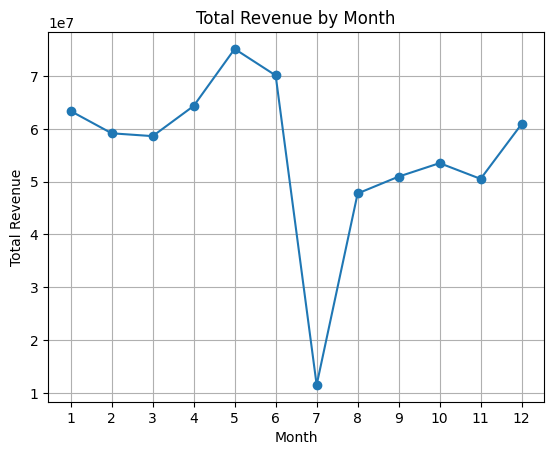

In [311]:
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(range(1, 13))  # Assuming months are represented by numbers 1 to 12
plt.grid(True)
plt.show()

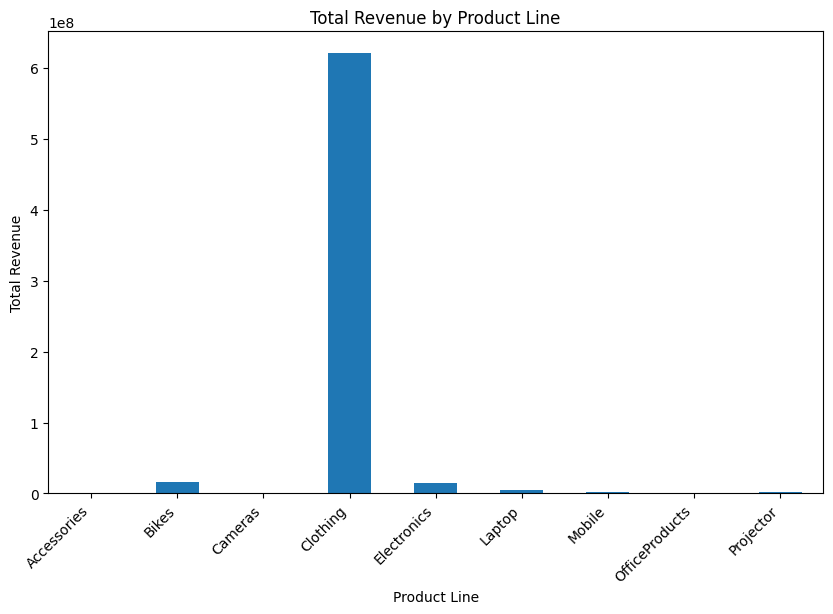

In [312]:
# Plot total revenue by product line
product_line_revenue = df.groupby('product_line')['total_amount'].sum()
plt.figure(figsize=(10, 6))
product_line_revenue.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Line')
plt.xticks(rotation=45, ha='right')
plt.show()


In [313]:
#plots

## Regression

For more info on regression models, see: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use ONLY ONE of the independent variables, such as month of the year
- Output your coefficients

In [314]:
df['order_month'] = df['order_date'].dt.month


In [315]:
# Create the feature matrix (X) and target vector (y)
X = df[['order_month']]  # Independent variable: month of the year
y = df['total_amount']    # Dependent variable: total revenue


In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [317]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [318]:
# Output the coefficients
print("Intercept:", model.intercept_)
print("Coefficient for order_month:", model.coef_[0])

Intercept: 12142.930391951993
Coefficient for order_month: -52.75589233215973



expected total revenue is approximately $12,142.93.



>




total revenue decreases by approximately 52.76.








In [319]:
# Make predictions
y_pred = model.predict(X_test)


In [345]:
# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", "{:.4f}".format(r2))


R^2 Score: -0.0001


 using the order month alone as the independent variable does not explain much of the variance in total revenue.





In [321]:
#create model

In [322]:
#display coefficients

## Regression - Improved

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use at least two more independent variables (see varabiables from Lab 7)
- Output your coefficients
- Did your R2 value improve (better fit)?

In [323]:

# Feature Engineering: Create dummy variables for 'state_province' and 'product_line'
dummy_vars = pd.get_dummies(df[['state_province', 'product_line']], drop_first=True)


In [324]:
# Concatenate the original dataframe with the dummy variables
df_concatenated = pd.concat([df, dummy_vars], axis=1)


In [325]:
# Create the feature matrix (X) and target vector (y)
X = df_concatenated[['order_month']].join(dummy_vars)  # Include month of the year along with dummy variables
y = df_concatenated['total_amount']


In [326]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [327]:
# Create and fit the linear regression model
model_improved = LinearRegression()
model_improved.fit(X_train, y_train)

LinearRegression()

In [328]:
# Output the coefficients
print("Intercept:", model_improved.intercept_)
print("Coefficients for order_month and dummy variables:")
print(model_improved.coef_)

Intercept: -2483.183112442668
Coefficients for order_month and dummy variables:
[-7.01373175e+01  5.48728030e+03  3.01218859e+03  3.59064849e+03
  3.83102115e+03  1.66064941e+03  1.21694413e+02  3.24879919e+03
  3.66994085e+03  5.52049877e+03  7.59628016e+03  2.12397741e+02
 -8.85031534e+02  2.33153430e+03  3.13779017e+03  5.05760806e+03
 -1.02588844e+03  2.23106622e+03  6.18828654e+03  6.58334030e+03
  3.04726598e+03  2.59811937e+03  1.30712752e+04  2.18437620e+03
  5.48232547e+03 -1.60952739e+03  4.78138467e+03  4.63102123e+03
  5.09178630e+03  4.52560660e+03  2.92527389e+03  3.66162273e+03
  3.53515411e+03  3.06712519e+03  1.43022521e+03 -1.30033122e+03
 -8.02557011e+03 -2.75709705e+03  4.36037731e+03  4.04046554e+03
  4.10829121e+03  2.93500584e+03  3.09748322e+03  4.93992014e+03
  4.69368325e+03  6.68213860e+03 -4.46136170e+02  3.79991273e+03
  5.24885915e+02  7.08382518e+02  4.07011081e+03  2.67977291e+03
  6.70529571e+02  2.26815104e+03  1.76265779e+03  6.61495863e+02
  9.579264

In [329]:
y_pred_improved = model_improved.predict(X_test)


In [330]:
# Calculate R^2 score
r2_improved = r2_score(y_test, y_pred_improved)
print("Improved R^2 Score:", r2_improved)

Improved R^2 Score: 0.180057104234575


when i included additional independent variables such as state/province and product line, the R^2 value increased to approximately 0.18.

## One-Hot Product

➡️ Assignment Tasks
- Create one-hot/dummy encoding for the product line variable.  Use those new encoded variables for the regression

In [335]:
print(df_encoded.columns)


Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'quantity', 'product_name', 'product_line',
       'product_price', 'total_amount', 'order_month',
       'product_line_Accessories', 'product_line_Bikes',
       'product_line_Cameras', 'product_line_Clothing',
       'product_line_Electronics', 'product_line_Laptop',
       'product_line_Mobile', 'product_line_OfficeProducts',
       'product_line_Projector'],
      dtype='object')


In [336]:
# Define features (X) and target (y)
X_encoded = df_encoded[['product_line_Laptop', 'product_line_Mobile', 'product_line_OfficeProducts', 'product_line_Accessories', 'product_line_Bikes', 'product_line_Cameras', 'product_line_Clothing', 'product_line_Electronics', 'product_line_Projector']]



In [337]:
y_encoded = df_encoded['total_amount']


In [338]:
# Create and fit the linear regression model
model_encoded = LinearRegression()
model_encoded.fit(X_encoded, y_encoded)

LinearRegression()

In [339]:
# Output the coefficients
print("Intercept:", model_encoded.intercept_)
print("Coefficients for product line categories:")
for i, col in enumerate(X_encoded.columns):
    print(f"{col}: {model_encoded.coef_[i]}")

Intercept: -4233991895036952.5
Coefficients for product line categories:
product_line_Laptop: 4233991895043309.0
product_line_Mobile: 4233991895037947.0
product_line_OfficeProducts: 4233991895036952.0
product_line_Accessories: 4233991895036992.0
product_line_Bikes: 4233991895038781.0
product_line_Cameras: 4233991895037639.0
product_line_Clothing: 4233991895134065.0
product_line_Electronics: 4233991895038065.5
product_line_Projector: 4233991895049705.5


In [340]:
y_pred_encoded = model_encoded.predict(X_encoded)


In [341]:
# Calculate R^2 score
r2_encoded = r2_score(y_encoded, y_pred_encoded)
print("Improved R^2 Score:", r2_encoded)

Improved R^2 Score: 0.16795925042655613


In [342]:
#create variable

In [343]:
#create model

In [344]:
#display coefficients